In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


from datetime import datetime

# customers data 

In [2]:
customersdf=pd.read_csv('C:\\Users\\User\\Desktop\\Rasheedat tafa\\maven power bi\\maven market report\\csv\\MavenMarket_Customers.csv')

In [3]:
customersdf.head()

,customer_id,customer_acct_num,first_name,last_name,customer_address,customer_city,customer_state_province,customer_postal_code,customer_country,birthdate,marital_status,yearly_income,gender,total_children,num_children_at_home,education,acct_open_date,member_card,occupation,homeowner
0,1,87462024688,Sheri,Nowmer,2433 Bailey Road,Tlaxiaco,Oaxaca,15057,Mexico,8/26/1961,M,$30K - $50K,F,4,2,Partial High School,9/10/1991,Bronze,Skilled Manual,Y
1,2,87470586299,Derrick,Whelply,2219 Dewing Avenue,Sooke,BC,17172,Canada,7/3/1915,S,$70K - $90K,M,1,0,Partial High School,3/11/1993,Bronze,Professional,N
2,3,87475757600,Jeanne,Derry,7640 First Ave.,Issaquah,WA,73980,USA,6/21/1910,M,$50K - $70K,F,1,1,Bachelors Degree,6/11/1991,Bronze,Professional,Y
3,4,87500482201,Michael,Spence,337 Tosca Way,Burnaby,BC,74674,Canada,6/20/1969,M,$10K - $30K,M,4,4,Partial High School,5/21/1994,Normal,Skilled Manual,N
4,5,87514054179,Maya,Gutierrez,8668 Via Neruda,Novato,CA,57355,USA,5/10/1951,S,$30K - $50K,F,3,0,Partial College,8/21/1992,Silver,Manual,N


In [4]:
customersdf.shape

(10281, 20)

In [5]:
customersdf.columns

Index(['customer_id', 'customer_acct_num', 'first_name', 'last_name',
       'customer_address', 'customer_city', 'customer_state_province',
       'customer_postal_code', 'customer_country', 'birthdate',
       'marital_status', 'yearly_income', 'gender', 'total_children',
       'num_children_at_home', 'education', 'acct_open_date', 'member_card',
       'occupation', 'homeowner'],
      dtype='object')

In [6]:
customers=customersdf[['customer_id','first_name', 'last_name','customer_city', 'customer_state_province',
       'customer_postal_code', 'customer_country', 'birthdate',
       'marital_status', 'yearly_income', 'gender', 'total_children',
        'education', 'member_card',
       'occupation', 'homeowner']]

In [7]:
customers.isnull().sum()

customer_id                0
first_name                 0
last_name                  0
customer_city              0
customer_state_province    0
customer_postal_code       0
customer_country           0
birthdate                  0
marital_status             0
yearly_income              0
gender                     0
total_children             0
education                  0
member_card                0
occupation                 0
homeowner                  0
dtype: int64

In [8]:
customers.dtypes

customer_id                 int64
first_name                 object
last_name                  object
customer_city              object
customer_state_province    object
customer_postal_code        int64
customer_country           object
birthdate                  object
marital_status             object
yearly_income              object
gender                     object
total_children              int64
education                  object
member_card                object
occupation                 object
homeowner                  object
dtype: object

In [90]:
customers.describe(include='O')

,first_name,last_name,customer_city,customer_state_province,customer_country,birthdate,marital_status,yearly_income,gender,education,member_card,occupation,homeowner
count,10281,10281,10281,10281,10281,10281,10281,10281,10281,10281,10281,10281,10281
unique,2300,5575,108,13,3,8149,2,8,2,5,4,5,2
top,John,Smith,Richmond,CA,USA,5/4/1927,M,$30K - $50K,M,Partial High School,Bronze,Professional,Y
freq,181,118,191,4222,7359,5,5142,3327,5184,3094,5703,3382,6187


# TRANSACTIONS

In [12]:
transactions1998=pd.read_csv('C:\\Users\\User\\Desktop\\Rasheedat tafa\\maven power bi\\maven market report\\csv\\transactions\\MavenMarket_Transactions_1998.csv')

In [13]:
transactions1997=pd.read_csv('C:\\Users\\User\\Desktop\\Rasheedat tafa\\maven power bi\\maven market report\\csv\\transactions\\MavenMarket_Transactions_1997.csv')

# joining the transactions tabales

In [14]:
transactionjoined=pd.concat([transactions1998,transactions1997])

In [15]:
transactionjoined

,transaction_date,stock_date,product_id,customer_id,store_id,quantity
0,1/1/1998,12/25/1997,4,2439,10,3
1,1/1/1998,12/28/1997,11,4284,10,3
2,1/1/1998,12/28/1997,12,534,10,3
3,1/1/1998,12/29/1997,14,9743,10,2
4,1/1/1998,12/27/1997,16,3608,10,3
...,...,...,...,...,...,...
86832,12/30/1997,12/29/1997,1376,7043,14,2
86833,12/30/1997,12/26/1997,1380,7043,14,1
86834,12/30/1997,12/23/1997,637,7043,14,2
86835,12/30/1997,12/29/1997,930,2145,14,1


# extracting month and year from transaction date

In [16]:
transactionjoined['date'] = pd.to_datetime(transactionjoined['transaction_date'])

In [17]:
transactionjoined['month'] = transactionjoined['date'].dt.month_name().str[:3]

In [18]:
transactionjoined['year'] = transactionjoined['date'].dt.year

In [105]:
transactionjoined.head()

,transaction_date,stock_date,product_id,customer_id,store_id,quantity,date,month,year
0,1/1/1998,12/25/1997,4,2439,10,3,1998-01-01,Jan,1998
1,1/1/1998,12/28/1997,11,4284,10,3,1998-01-01,Jan,1998
2,1/1/1998,12/28/1997,12,534,10,3,1998-01-01,Jan,1998
3,1/1/1998,12/29/1997,14,9743,10,2,1998-01-01,Jan,1998
4,1/1/1998,12/27/1997,16,3608,10,3,1998-01-01,Jan,1998


In [20]:
transactionjoined.columns

Index(['transaction_date', 'stock_date', 'product_id', 'customer_id',
       'store_id', 'quantity', 'date', 'month', 'year'],
      dtype='object')

In [21]:
transactions=transactionjoined[['date',  'year', 'month','stock_date', 'product_id', 'customer_id',
       'store_id', 'quantity']]

In [104]:
transactions.head()

,date,year,month,stock_date,product_id,customer_id,store_id,quantity
0,1998-01-01,1998,Jan,12/25/1997,4,2439,10,3
1,1998-01-01,1998,Jan,12/28/1997,11,4284,10,3
2,1998-01-01,1998,Jan,12/28/1997,12,534,10,3
3,1998-01-01,1998,Jan,12/29/1997,14,9743,10,2
4,1998-01-01,1998,Jan,12/27/1997,16,3608,10,3


In [23]:
transactions.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,269720.0,1997.678048,0.467226,1997.0,1997.0,1998.0,1998.0,1998.0
product_id,269720.0,783.862873,447.926131,1.0,396.0,787.0,1174.0,1559.0
customer_id,269720.0,5119.390405,2901.883077,3.0,2570.0,5090.0,7614.0,10281.0
store_id,269720.0,12.753730,6.349746,1.0,7.0,13.0,17.0,24.0
quantity,269720.0,3.090201,0.835554,1.0,3.0,3.0,4.0,6.0


In [24]:
transactions.isnull().sum() 

date           0
year           0
month          0
stock_date     0
product_id     0
customer_id    0
store_id       0
quantity       0
dtype: int64

# PRODUCT TABLE

In [29]:
productdf=pd.read_csv('C:\\Users\\User\\Desktop\\Rasheedat tafa\\maven power bi\\maven market report\\csv\\MavenMarket_products.csv')

In [30]:
productdf.head()

,product_id,product_brand,product_name,product_sku,product_retail_price,product_cost,product_weight,recyclable,low_fat
0,1,Washington,Washington Berry Juice,90748583674,2.85,0.94,8.39,NaN,NaN
1,2,Washington,Washington Mango Drink,96516502499,0.74,0.26,7.42,NaN,1.0
2,3,Washington,Washington Strawberry Drink,58427771925,0.83,0.40,13.10,1.0,1.0
3,4,Washington,Washington Cream Soda,64412155747,3.64,1.64,10.60,1.0,NaN
4,5,Washington,Washington Diet Soda,85561191439,2.19,0.77,6.66,1.0,NaN


In [31]:
productdf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
product_id,1560.0,7.805000e+02,4.504775e+02,1.000000e+00,3.907500e+02,7.805000e+02,1.170250e+03,1.560000e+03
product_sku,1560.0,5.562930e+10,2.580380e+10,1.003103e+10,3.345056e+10,5.629308e+10,7.798317e+10,9.998368e+10
product_retail_price,1560.0,2.117282e+00,9.327793e-01,5.000000e-01,1.417500e+00,2.130000e+00,2.792500e+00,3.980000e+00
product_cost,1560.0,8.539679e-01,4.044001e-01,1.600000e-01,5.400000e-01,8.200000e-01,1.130000e+00,1.970000e+00
product_weight,1560.0,1.380482e+01,4.631014e+00,6.000000e+00,9.657500e+00,1.360000e+01,1.772500e+01,2.190000e+01
recyclable,873.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
low_fat,552.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [32]:
productdf.isnull().sum()

product_id                 0
product_brand              0
product_name               0
product_sku                0
product_retail_price       0
product_cost               0
product_weight             0
recyclable               687
low_fat                 1008
dtype: int64

# STORES TABLE

In [33]:
storesdf=pd.read_csv('C:\\Users\\User\\Desktop\\Rasheedat tafa\\maven power bi\\maven market report\\csv\\MavenMarket_Stores.csv')

In [34]:
storesdf.head()

,store_id,region_id,store_type,store_name,store_street_address,store_city,store_state,store_country,store_phone,first_opened_date,last_remodel_date,total_sqft,grocery_sqft
0,1,28,Supermarket,Store 1,2853 Bailey Rd,Acapulco,Guerrero,Mexico,262-555-5124,1/9/1982,12/5/1990,23593,17475
1,2,78,Small Grocery,Store 2,5203 Catanzaro Way,Bellingham,WA,USA,605-555-8203,4/2/1970,6/4/1973,28206,22271
2,3,76,Supermarket,Store 3,1501 Ramsey Circle,Bremerton,WA,USA,509-555-1596,6/14/1959,11/19/1967,39696,24390
3,4,27,Gourmet Supermarket,Store 4,433 St George Dr,Camacho,Zacatecas,Mexico,304-555-1474,9/27/1994,12/1/1995,23759,16844
4,5,4,Small Grocery,Store 5,1250 Coggins Drive,Guadalajara,Jalisco,Mexico,801-555-4324,9/18/1978,6/29/1991,24597,15012


In [35]:
storesdf.isnull().sum()

store_id                0
region_id               0
store_type              0
store_name              0
store_street_address    0
store_city              0
store_state             0
store_country           0
store_phone             0
first_opened_date       0
last_remodel_date       0
total_sqft              0
grocery_sqft            0
dtype: int64

# MERGING THE DATA SETS

In [36]:
merged1 = pd.merge(transactions, customers, on='customer_id', how='inner')


In [37]:
merged2= pd.merge(merged1, productdf, on='product_id', how='inner')

In [38]:
merged2= pd.merge(merged1, productdf, on='product_id', how='inner')

In [39]:
merged3= pd.merge(merged2, storesdf, on='store_id', how='inner')

In [40]:
merged3.columns

Index(['date', 'year', 'month', 'stock_date', 'product_id', 'customer_id',
       'store_id', 'quantity', 'first_name', 'last_name', 'customer_city',
       'customer_state_province', 'customer_postal_code', 'customer_country',
       'birthdate', 'marital_status', 'yearly_income', 'gender',
       'total_children', 'education', 'member_card', 'occupation', 'homeowner',
       'product_brand', 'product_name', 'product_sku', 'product_retail_price',
       'product_cost', 'product_weight', 'recyclable', 'low_fat', 'region_id',
       'store_type', 'store_name', 'store_street_address', 'store_city',
       'store_state', 'store_country', 'store_phone', 'first_opened_date',
       'last_remodel_date', 'total_sqft', 'grocery_sqft'],
      dtype='object')

In [41]:
mavensales=merged3[['date', 'year', 'month', 'stock_date',
        'first_name', 'last_name', 'customer_city', 'customer_country',
       'birthdate', 'marital_status', 'yearly_income', 'gender',
       'total_children', 'member_card', 'occupation', 'homeowner',
       'store_city',
       'store_state', 'store_country', 'first_opened_date',
       'last_remodel_date',  'recyclable', 'low_fat','product_brand','product_name',
       
       'product_cost','quantity','product_retail_price']]

In [42]:
mavensales.head()

,date,year,month,stock_date,first_name,last_name,customer_city,customer_country,birthdate,marital_status,...,store_country,first_opened_date,last_remodel_date,recyclable,low_fat,product_brand,product_name,product_cost,quantity,product_retail_price
0,1998-01-01,1998,Jan,12/25/1997,Joyce,Furrer,Orizaba,Mexico,4/17/1924,S,...,Mexico,4/13/1979,1/30/1982,1.0,NaN,Washington,Washington Cream Soda,1.64,3,3.64
1,1998-12-14,1998,Dec,12/7/1998,James,Dennard,Orizaba,Mexico,7/21/1949,S,...,Mexico,4/13/1979,1/30/1982,1.0,NaN,Washington,Washington Cream Soda,1.64,5,3.64
2,1998-08-29,1998,Aug,8/22/1998,Nicholas,Takemura,Orizaba,Mexico,10/21/1957,M,...,Mexico,4/13/1979,1/30/1982,1.0,NaN,Washington,Washington Cream Soda,1.64,4,3.64
3,1998-04-15,1998,Apr,4/8/1998,Carolyn,Staton,Orizaba,Mexico,5/14/1970,S,...,Mexico,4/13/1979,1/30/1982,1.0,NaN,Washington,Washington Cream Soda,1.64,2,3.64
4,1998-03-07,1998,Mar,2/28/1998,Allan,Marchman,Orizaba,Mexico,4/28/1976,M,...,Mexico,4/13/1979,1/30/1982,1.0,NaN,Washington,Washington Cream Soda,1.64,5,3.64


In [43]:
mavensales['costprice']=mavensales['quantity']* mavensales['product_cost']

C:\Users\User\AppData\Local\Temp\ipykernel_15632\3635215427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mavensales['costprice']=mavensales['quantity']* mavensales['product_cost']


In [44]:
mavensales['revenue']=mavensales['quantity']* mavensales['product_retail_price']

C:\Users\User\AppData\Local\Temp\ipykernel_15632\2609577327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mavensales['revenue']=mavensales['quantity']* mavensales['product_retail_price']


In [45]:
mavensales['profit']=mavensales['revenue']-mavensales['costprice']

C:\Users\User\AppData\Local\Temp\ipykernel_15632\2782998641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mavensales['profit']=mavensales['revenue']-mavensales['costprice']


In [46]:
mavensales.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,269720.0,1997.678048,0.467226,1997.00,1997.00,1998.00,1998.00,1998.00
total_children,269720.0,2.535351,1.490679,0.00,1.00,3.00,4.00,5.00
recyclable,151289.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.00
low_fat,95469.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.00
product_cost,269720.0,0.854207,0.403358,0.16,0.54,0.82,1.13,1.97
quantity,269720.0,3.090201,0.835554,1.00,3.00,3.00,4.00,6.00
product_retail_price,269720.0,2.117859,0.930726,0.50,1.42,2.13,2.79,3.98
costprice,269720.0,2.638765,1.474089,0.16,1.50,2.38,3.52,10.80
revenue,269720.0,6.542142,3.461318,0.50,3.81,5.94,8.67,23.64
profit,269720.0,3.903377,2.093834,0.25,2.28,3.60,5.20,15.24


In [67]:
mavensales['revenue'].sum()


1764546.44

In [48]:
mavensales['profit'].sum()

1052818.78

In [49]:
mavensales['quantity'].sum()

833489

In [206]:
all_sales = pd.DataFrame(mavensales.groupby(['year','month'])[['quantity','revenue','profit']].sum())
sales = all_sales.sort_values(by='quantity', ascending=False)
sales


quantity    revenue    profit
year month                               
1998 Dec       56729  120160.84  71682.44
     Nov       53807  113787.84  67871.78
     Sep       47964  101378.60  60480.02
     Jul       46671   98943.44  59016.31
     Mar       46334   98219.90  58612.10
     Jan       46313   98155.28  58689.62
     Jun       45611   97050.04  57937.76
     May       45085   95183.81  56917.90
     Apr       45049   94776.14  56504.88
     Aug       44777   94718.51  56462.12
     Feb       44431   94498.00  56451.49
     Oct       43945   92435.91  55066.88
1997 Dec       26796   56965.64  33998.31
     Nov       25270   53363.71  31837.20
     Jul       23763   50246.88  30005.09
     Mar       23706   50029.87  29827.04
     Aug       21697   46199.04  27522.96
     Jan       21628   45539.69  27173.83
     Jun       21350   45331.73  27059.81
     May       21081   44456.29  26497.52
     Feb       20957   44058.79  26265.96
     Sep       20388   43825.97  26159.69
     Apr       20179   42878.25  25568.09
     Oct       19958   42342.27  25209.98

In [131]:
yearlysales=pd.DataFrame(mavensales.groupby('year')[['quantity','revenue','profit']].sum())
yearlysales

,quantity,revenue,profit
year,,,
1997,266773,565238.13,337125.48
1998,566716,1199308.31,715693.30


In [195]:
productb= pd.DataFrame(mavensales.groupby('product_brand')[['quantity','revenue','profit']].sum())
productbrand = productb.sort_values(by='quantity', ascending=False)
productbrand.nlargest(20,'quantity')

,quantity,revenue,profit
product_brand,,,
Hermanos,24682,56659.48,33167.27
Tell Tale,23801,51561.22,29925.59
Ebony,23492,49727.46,29749.45
Tri-State,23400,49347.75,29064.76
High Top,22040,47200.53,28502.83
Nationeel,19959,45384.82,27446.16
Horatio,19205,43787.75,25589.28
Fast,19118,40532.84,24746.78
Fort West,18869,40061.03,23951.11


In [199]:
countryrev = pd.DataFrame(mavensales.groupby('store_country')[['revenue','profit','quantity']].sum())
countryrevenue= countryrev.sort_values(by='revenue', ascending=False)
countryrevenue

,revenue,profit,quantity
store_country,,,
USA,1177956.44,702790.46,555899
Mexico,478915.66,285687.32,226838
Canada,107674.34,64341.00,50752


In [182]:
memcard=pd.DataFrame(mavensales.groupby('member_card')[['revenue','profit','quantity']].sum())
memcard

,revenue,profit,quantity
member_card,,,
Bronze,986502.65,588626.31,465090
Golden,223670.66,133451.79,106251
Normal,406875.66,242817.16,192265
Silver,147497.47,87923.52,69883


In [135]:
monthorders = pd.DataFrame(mavensales.groupby('month')[['quantity','revenue','profit']].sum())
monthlyorders = monthorders.sort_values(by='quantity', ascending=False)
monthlyorders


,quantity,revenue,profit
month,,,
Dec,83525,177126.48,105680.75
Nov,79077,167151.55,99708.98
Jul,70434,149190.32,89021.40
Mar,70040,148249.77,88439.14
Sep,68352,145204.57,86639.71
Jan,67941,143694.97,85863.45
Jun,66961,142381.77,84997.57
Aug,66474,140917.55,83985.08
May,66166,139640.10,83415.42


<AxesSubplot:>

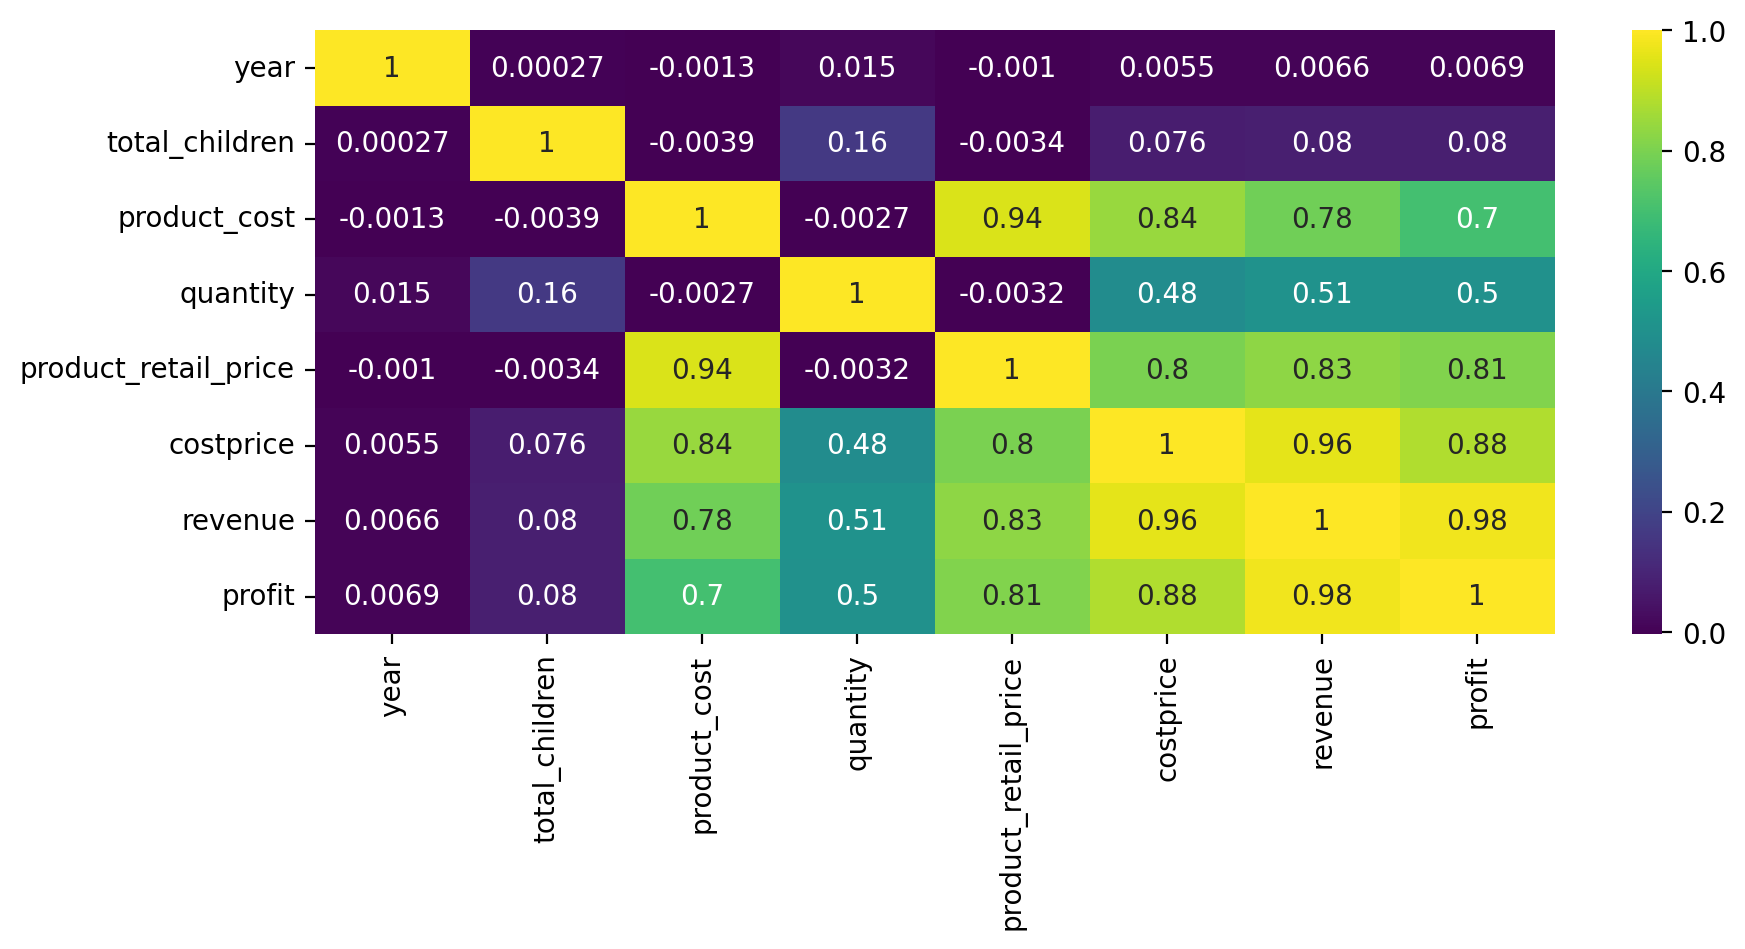

In [50]:
plt.figure(figsize=(10,4),dpi=200)
sns.heatmap(mavensales.drop(['recyclable','low_fat'],axis=1).corr(),annot=True,cmap='viridis')

<AxesSubplot:title={'center':'GENDER PER COUNTRY'}, xlabel='store_country', ylabel='count'>

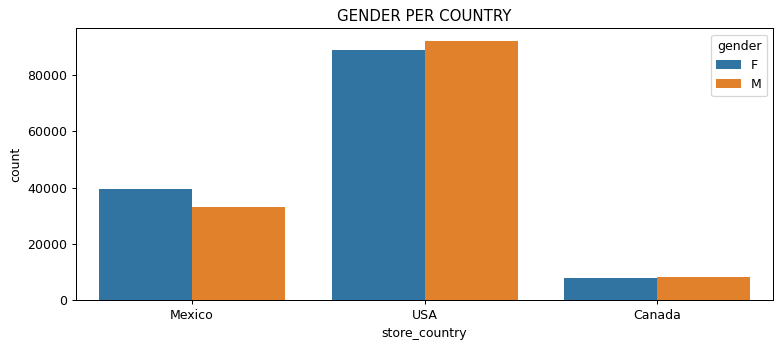

In [118]:
plt.figure(figsize=(10,4),dpi=90)
plt.title("GENDER PER COUNTRY")
sns.countplot(x=mavensales.store_country,hue=mavensales.gender)

Text(0.5, 1.0, 'REVENUE PER STORE COUNTRY')

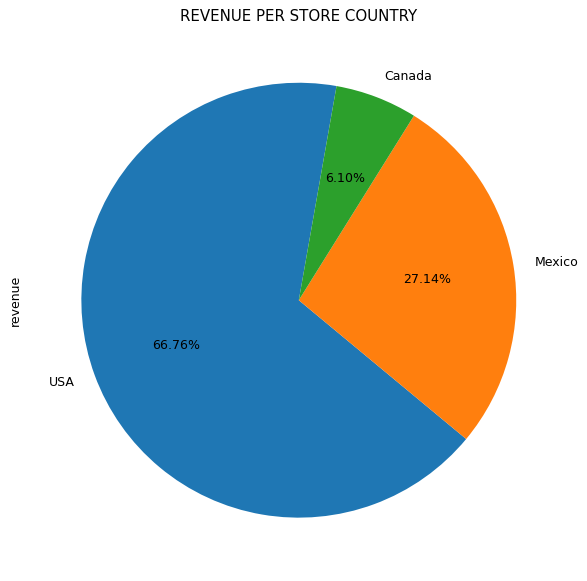

In [188]:
plt.figure(figsize=(8,8),dpi=90)
countryrevenue['revenue'].plot.pie(autopct="%1.2f%%",startangle=80)
plt.title('REVENUE PER STORE COUNTRY')

Text(0.5, 1.0, 'TOP PRODUCT BRAND BY REVENUE')

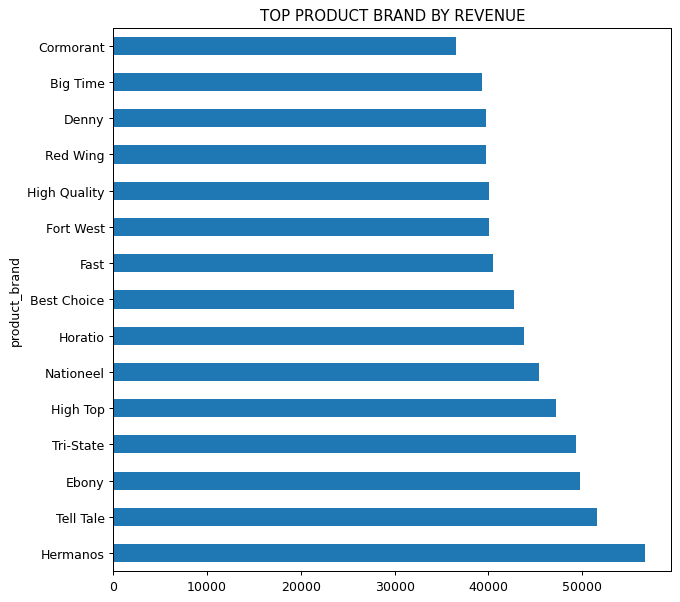

In [197]:
plt.figure(figsize=(8,8),dpi=90)

mavensales.groupby('product_brand')['revenue'].sum().nlargest(15).plot(kind='barh')
plt.title('TOP PRODUCT BRAND BY REVENUE')


Text(0.5, 1.0, 'REVENUE VS CUSTOMERS MEMBER CARD')

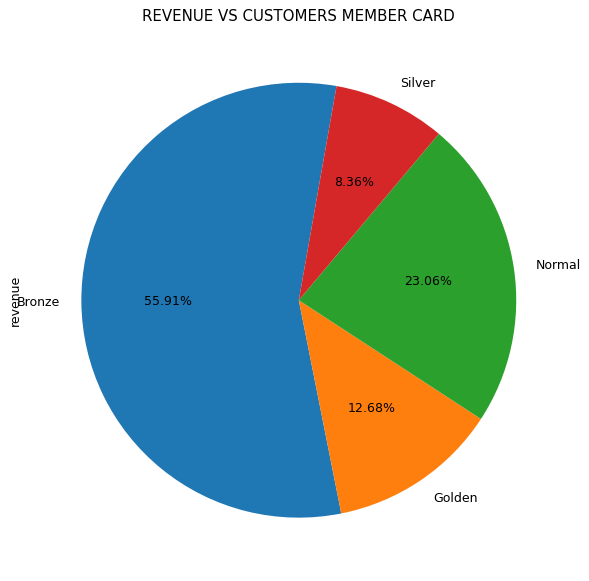

In [181]:
plt.figure(figsize=(8,8),dpi=90)


memcard['revenue'].plot.pie(autopct="%1.2f%%",startangle=80)
plt.title('REVENUE VS CUSTOMERS MEMBER CARD')

Text(0.5, 1.0, 'QUANTITY SOLD PER MONTH')

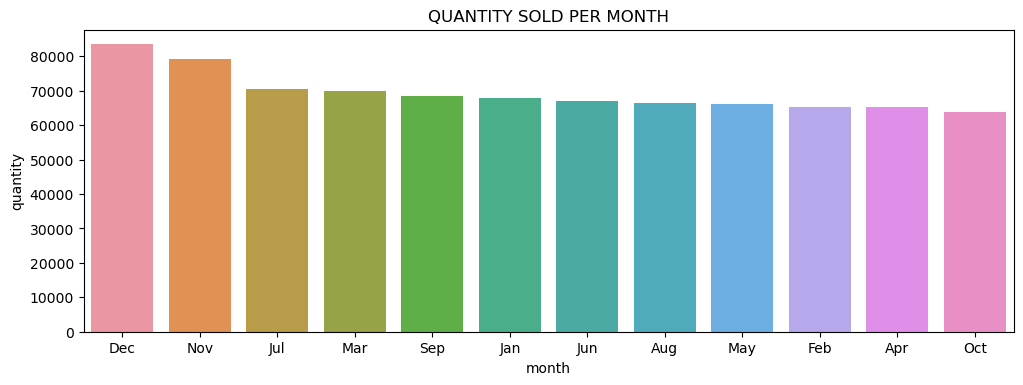

In [128]:
plt.figure(figsize=(12,4),dpi=100)
sns.barplot(x=monthlyorders.index, y=monthlyorders['quantity'])
plt.title('QUANTITY SOLD PER MONTH')

Text(0.5, 1.0, 'REVENUE PER YEAR')

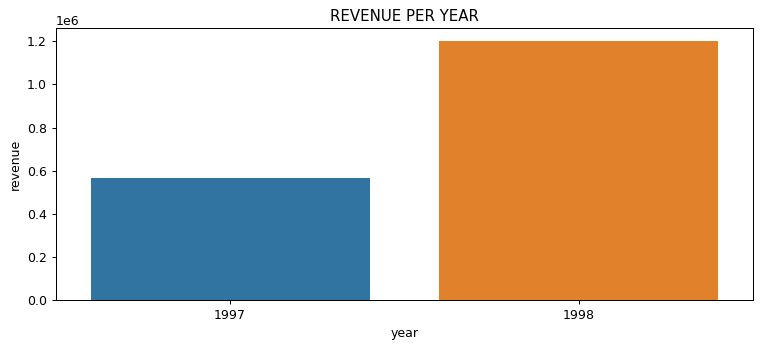

In [133]:
plt.figure(figsize=(10,4),dpi=90)
sns.barplot(x=yearlysales.index, y=yearlysales['revenue'])
plt.title('REVENUE PER YEAR')